### Kaggle Competition - Catch Me If You Can ("Alice")
https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/overview


##### Final accuracy on submission -  93%

#### Import necessary libraries and read the CSV's. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv('train_sessions.csv', index_col = 'session_id')
test_df = pd.read_csv('test_sessions.csv', index_col = 'session_id')



In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

### Sessions by Alice

In [4]:
train_df['target'].value_counts()[1] 

2297

In [5]:
train_df.shape

(253561, 21)

In [6]:
print(" Percentage of Alice sessions", (train_df['target'].value_counts()[1]/train_df.shape[0] )*100)

 Percentage of Alice sessions 0.905896411514389


## Data Processing

##### Create a 'times' array. This holds all the features of time1,time2...time10.

In [7]:
times=[]

In [8]:
i=0
for col in train_df.columns:
    if( i % 2!=0):
        times.append(col)
    i=i+1

In [9]:
train_df[times] = train_df[times].apply(pd.to_datetime)

In [10]:
test_df[times] = test_df[times].apply(pd.to_datetime)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   site1   253561 non-null  int64         
 1   time1   253561 non-null  datetime64[ns]
 2   site2   250098 non-null  float64       
 3   time2   250098 non-null  datetime64[ns]
 4   site3   246919 non-null  float64       
 5   time3   246919 non-null  datetime64[ns]
 6   site4   244321 non-null  float64       
 7   time4   244321 non-null  datetime64[ns]
 8   site5   241829 non-null  float64       
 9   time5   241829 non-null  datetime64[ns]
 10  site6   239495 non-null  float64       
 11  time6   239495 non-null  datetime64[ns]
 12  site7   237297 non-null  float64       
 13  time7   237297 non-null  datetime64[ns]
 14  site8   235224 non-null  float64       
 15  time8   235224 non-null  datetime64[ns]
 16  site9   233084 non-null  float64       
 17  time9   233084 non-null  date

In [12]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [13]:
train_df=train_df.sort_values(by=['time1'])

In [14]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


## EDA 

In [15]:
from  pylab  import  rcParams
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

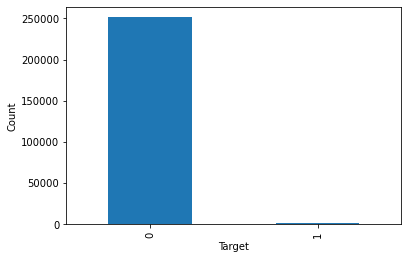

In [16]:
train_df['target'].value_counts().plot( kind = 'bar' ,  label = 'target')
plt.xlabel ( 'Target' ) 
plt.ylabel ( 'Count' )

[Text(0.5, 1.0, 'Alices timing analysis')]

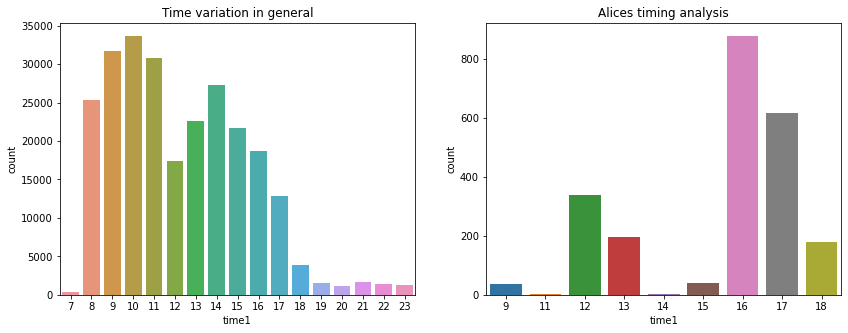

In [17]:
# for h in train_df['time1']:
#     print(h.hour)
_ ,  axes  =  plt . subplots ( 1 ,  2 ,  figsize = ( 14 , 5 )) 
sns.countplot(x = train_df['time1'].apply(lambda x:x.hour) , data=train_df,ax = axes[0])

alice_time = train_df[train_df['target']==1]
sns.countplot(x = alice_time['time1'].apply(lambda x:x.hour) , data=alice_time,ax = axes[1])

axes[0].set(title='Time variation in general')
axes[1].set(title='Alices timing analysis')


* Alice's sessions peaks around 12-13 (lunch) and from 16-18(after work maybe)

[Text(0.5, 1.0, 'Alices timing analysis')]

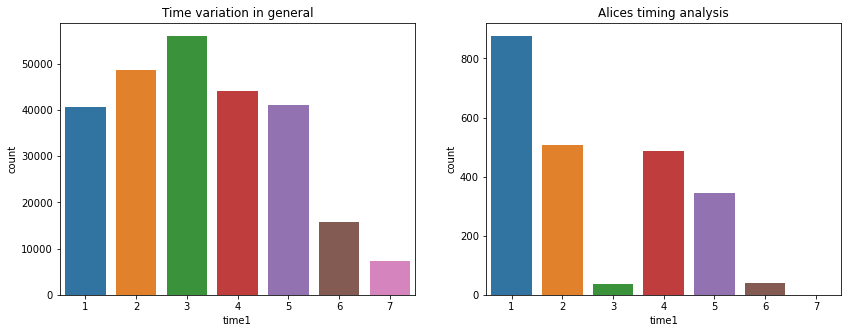

In [18]:
_ ,  axes  =  plt . subplots ( 1 ,  2 ,  figsize = ( 14 , 5 )) 
sns.countplot(x = train_df['time1'].apply(lambda x:x.weekday()+1) , data=train_df,ax = axes[0])

alice_time = train_df[train_df['target']==1]
sns.countplot(x = alice_time['time1'].apply(lambda x:x.weekday()+1) , data=alice_time,ax = axes[1])

axes[0].set(title='Time variation in general')
axes[1].set(title='Alices timing analysis')

* Alice is active on Monday which is her Max and Tuesday, Thursday, Friday

#### Training and Testing with minimal changes to features :

In [19]:
sites=['site%s' % j for j in range(1,11)]
train_df[sites].fillna(0).astype('int').to_csv('train_sessions_text.txt',sep=' ',index=None,header=None)

In [20]:
test_df[sites].fillna(0).astype('int').to_csv('test_sessions_text.txt',sep=' ',index=None,header=None)

In [21]:
%%time
cv = CountVectorizer()
with open('train_sessions_text.txt') as inp_train_file:
    X_train = cv.fit_transform(inp_train_file)
with open('test_sessions_text.txt') as inp_test_file:
    X_test = cv.transform(inp_test_file)
    

Wall time: 7.54 s


In [22]:
print(X_train.shape, X_test.shape)

(253561, 41592) (82797, 41592)


In [23]:
y_train = train_df['target'].astype('int')

### Approach 1 -Train logistic regression on this data 

In [24]:
logit = LogisticRegression(C=1 , random_state=17,max_iter=10000)

In [25]:
cv_scores=cross_val_score(logit, X_train,y_train,cv=5, scoring='roc_auc')

In [26]:
logit.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [27]:
test_pred_logit1 = logit.predict_proba(X_test)[:,1]

In [28]:
test_pred_logit1

array([2.30886125e-03, 4.62808709e-09, 1.90379751e-08, ...,
       8.74876078e-03, 4.53678071e-04, 2.15368473e-05])

In [29]:
def write_to_sub_file(predicted_labels,out_file,target='target',index_label='session_id'):
    predicted_df = pd.DataFrame(predicted_labels, index = np.arange(1, predicted_labels.shape[0]+1),
                               columns=[target])
    predicted_df.to_csv(out_file,index_label=index_label)

In [30]:
write_to_sub_file(test_pred_logit1,'logit_submission1.txt')

In [31]:
## CV score of 88.5 and Public Leaderboard =90.47

### Approach 2 - Logistic Regression but time feature modified

In [32]:
### time features
from scipy.sparse import hstack

In [33]:
def add_time_features(df,X_sparse):
    hours=df['time1'].apply(lambda ts : ts.hour)
    morning = ((hours>=7) & (hours<=11)).astype('int')
    day = ((hours>=12) & (hours<=18)).astype('int')
    evening = ((hours>=19) & (hours<=23)).astype('int')
    night = ((hours>=0) & (hours<=6)).astype('int')
    X = hstack([X_sparse, morning.values.reshape(-1,1),day.values.reshape(-1,1),
                evening.values.reshape(-1,1),night.values.reshape(-1,1)])
    return X

In [34]:
X_train_with_time= add_time_features(train_df.fillna(0),X_train)
X_test_with_time= add_time_features(test_df.fillna(0), X_test)

In [35]:
X_train_with_time

<253561x41596 sparse matrix of type '<class 'numpy.int64'>'
	with 1656833 stored elements in COOrdinate format>

In [36]:
cv_scores_time=cross_val_score(logit, X_train_with_time,y_train,cv=5, scoring='roc_auc')

In [37]:
cv_scores_time.mean()

0.9308802173147264

In [38]:
logit.fit(X_train_with_time,y_train)

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [39]:
test_pred_logit2 = logit.predict_proba(X_test_with_time)[:,1]

In [40]:
write_to_sub_file(test_pred_logit2,'logit_submission2.txt')

In [50]:
sites = ['site%s' % i for i in range(1, 11)]
train_df[sites].fillna(0).astype('int').to_csv('train_sessions_text.txt', 
                                               sep=' ', 
                       index=None, header=None)
test_df[sites].fillna(0).astype('int').to_csv('test_sessions_text.txt', 
                                              sep=' ', 
                       index=None, header=None)

In [51]:
cv = CountVectorizer(ngram_range=(1,3), max_features=50000)

In [52]:
with open('train_sessions_text.txt') as inp_train_file:
    X_train = cv.fit_transform(inp_train_file)
with open('test_sessions_text.txt') as inp_test_file:
    X_test = cv.transform(inp_test_file)
X_train.shape, X_test.shape

((253561, 50000), (82797, 50000))

In [54]:
y_train = train_df['target'].astype('int').values

### Approach 3 - Time Series Split of Data

In [56]:
from sklearn.model_selection import TimeSeriesSplit
time_split = TimeSeriesSplit(n_splits=10)

In [57]:
[(el[0].shape, el[1].shape) for el in time_split.split(X_train)]

[((23051,), (23051,)),
 ((46102,), (23051,)),
 ((69153,), (23051,)),
 ((92204,), (23051,)),
 ((115255,), (23051,)),
 ((138306,), (23051,)),
 ((161357,), (23051,)),
 ((184408,), (23051,)),
 ((207459,), (23051,)),
 ((230510,), (23051,))]

In [58]:
logit = LogisticRegression(C=1, random_state=17, solver='liblinear')

In [59]:
cv_scores = cross_val_score( logit,X_train,y_train, cv = time_split,n_jobs=1,scoring='roc_auc')

In [60]:
cv_scores.mean()

0.8675551015343101

In [61]:
logit.fit(X_train,y_train)

LogisticRegression(C=1, random_state=17, solver='liblinear')

In [62]:
logit_pred = logit.predict_proba(X_test)[:,1]

In [63]:
write_to_sub_file(logit_pred,"submission3.csv")

### Approach 4 - Time Series Split + Time feature modified

In [65]:
X_train_with_time_new = add_time_features(train_df.fillna(0), X_train)

In [66]:
X_test_with_time_new = add_time_features(test_df.fillna(0), X_test)

In [69]:
X_train_with_time_new.shape , X_test_with_time_new.shape

((253561, 50004), (82797, 50004))

In [70]:
cv_scores = cross_val_score( logit,X_train_with_time_new,y_train, cv = time_split,n_jobs=1,scoring='roc_auc')

In [72]:
cv_scores.mean()

0.9159559070722423

In [73]:
logit.fit(X_train_with_time_new,y_train)

LogisticRegression(C=1, random_state=17, solver='liblinear')

In [74]:
logit_pred = logit.predict_proba(X_test_with_time_new)[:,1]

In [75]:
write_to_sub_file(logit_pred,"submission4.csv")

### Approach 5 -  Approach 4 + Hyper parameter tuning - C

In [76]:
c_values = np.logspace(-2, 2, 10)

In [78]:
from sklearn.model_selection import GridSearchCV
logit_grid_searcher = GridSearchCV(estimator=logit, param_grid={'C': c_values},
                                  scoring='roc_auc', n_jobs=1, cv=time_split, verbose=1)

In [80]:
logit_grid_searcher.fit(X_train_with_time_new, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.4min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=LogisticRegression(C=1, random_state=17,
                                          solver='liblinear'),
             n_jobs=1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])},
             scoring='roc_auc', verbose=1)

In [81]:
logit_grid_searcher.best_estimator_

LogisticRegression(C=0.21544346900318834, random_state=17, solver='liblinear')

In [82]:
logit_pred = logit_grid_searcher.predict_proba(X_test_with_time_new)[:,1]

In [84]:
write_to_sub_file(logit_pred, 'submission5.csv')

### Approach 6 - To be done  - Create additional scaled features 

In [41]:
train_df [ sites ]  =  train_df [ sites ] . fillna ( 0 ) . astype ( int ) 
test_df [ sites ]  =  test_df [ sites ] . fillna ( 0 ) . astype ( int )

train_df [ times ]  =  train_df [ times ] . fillna ( 0 ) 
test_df [ times ]  =  test_df [ times ] . fillna ( 0 )

In [42]:
full_df = pd.concat([train_df.drop('target',axis=1), test_df])

In [43]:
train_df.shape, test_df.shape

((253561, 21), (82797, 20))

##### sparse matrix for individual sites.

In [44]:
from scipy.sparse import csr_matrix

In [45]:
full_sites = full_df[sites]
full_sites.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
21669,56,55,0,0,0,0,0,0,0,0
54843,56,55,56,55,0,0,0,0,0,0
77292,946,946,951,946,946,945,948,784,949,946
114021,945,948,949,948,945,946,947,945,946,946
146670,947,950,948,947,950,952,946,951,946,947


In [46]:
sites_flatten = full_sites.values.flatten()

In [47]:
full_sites_sparse = csr_matrix(full_sites)
full_sites_sparse.shape

(336358, 10)

In [48]:
full_sites_sparse

<336358x10 sparse matrix of type '<class 'numpy.intc'>'
	with 3195430 stored elements in Compressed Sparse Row format>

In [49]:
full_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55,2013-01-12 08:05:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54843,56,2013-01-12 08:37:23,55,2013-01-12 08:37:23,56,2013-01-12 09:07:07,55,2013-01-12 09:07:09,0,0,0,0,0,0,0,0,0,0,0,0
77292,946,2013-01-12 08:50:13,946,2013-01-12 08:50:14,951,2013-01-12 08:50:15,946,2013-01-12 08:50:15,946,2013-01-12 08:50:16,945,2013-01-12 08:50:16,948,2013-01-12 08:50:16,784,2013-01-12 08:50:16,949,2013-01-12 08:50:17,946,2013-01-12 08:50:17
114021,945,2013-01-12 08:50:17,948,2013-01-12 08:50:17,949,2013-01-12 08:50:18,948,2013-01-12 08:50:18,945,2013-01-12 08:50:18,946,2013-01-12 08:50:18,947,2013-01-12 08:50:19,945,2013-01-12 08:50:19,946,2013-01-12 08:50:19,946,2013-01-12 08:50:20
146670,947,2013-01-12 08:50:20,950,2013-01-12 08:50:20,948,2013-01-12 08:50:20,947,2013-01-12 08:50:21,950,2013-01-12 08:50:21,952,2013-01-12 08:50:21,946,2013-01-12 08:50:21,951,2013-01-12 08:50:22,946,2013-01-12 08:50:22,947,2013-01-12 08:50:22
